In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
df = pd.read_csv('customer_data_2.csv')

### EDA

In [70]:

variaveis_seg = df[['income','spending_score','membership_years','purchase_frequency','last_purchase_amount']]

num_all_null_rows = variaveis_seg.isnull().all(axis=1).sum()

print("Número de linhas onde todas as variáveis são vazias ou nulas:", num_all_null_rows)

num_any_null_rows = variaveis_seg.isnull().any(axis=1).sum()
print("Número de linhas onde pelo menos uma variável é vazia ou nula:", num_any_null_rows)



Número de linhas onde todas as variáveis são vazias ou nulas: 0
Número de linhas onde pelo menos uma variável é vazia ou nula: 235


In [71]:
df.info()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    950 non-null    float64
 1   age                   951 non-null    float64
 2   gender                945 non-null    object 
 3   income                944 non-null    float64
 4   spending_score        951 non-null    float64
 5   membership_years      950 non-null    float64
 6   purchase_frequency    955 non-null    float64
 7   preferred_category    939 non-null    object 
 8   last_purchase_amount  945 non-null    float64
dtypes: float64(7), object(2)
memory usage: 70.4+ KB
(1000, 9)


In [72]:
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1.0,38.0,Female,99342.0,90.0,3.0,24.0,Groceries,113.53
1,2.0,21.0,Female,78852.0,60.0,2.0,42.0,NaN,41.93
2,3.0,60.0,Female,126573.0,30.0,2.0,28.0,Clothing,424.36
3,4.0,40.0,Other,47099.0,74.0,9.0,5.0,NaN,991.93
4,5.0,65.0,Female,140621.0,21.0,3.0,25.0,Electronics,347.08


In [73]:
df['preferred_category'].value_counts()

preferred_category
Sports           200
Electronics      196
Home & Garden    192
Groceries        189
Clothing         158
Elec               4
Name: count, dtype: int64

In [74]:
df['id'] = df['id'].astype(str)


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   object 
 1   age                   951 non-null    float64
 2   gender                945 non-null    object 
 3   income                944 non-null    float64
 4   spending_score        951 non-null    float64
 5   membership_years      950 non-null    float64
 6   purchase_frequency    955 non-null    float64
 7   preferred_category    939 non-null    object 
 8   last_purchase_amount  945 non-null    float64
dtypes: float64(6), object(3)
memory usage: 70.4+ KB


In [76]:
df['age'].isnull().sum()

np.int64(49)

In [77]:
df.describe()

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount
count,951.000000,9.440000e+02,951.000000,950.000000,955.000000,945.000000
mean,43.915878,9.805376e+04,54.931651,5.460000,26.514136,492.320042
std,14.994289,9.887927e+04,54.227014,2.863229,14.223160,294.994270
min,18.000000,3.000400e+04,1.000000,1.000000,1.000000,10.400000
25%,30.000000,5.866500e+04,27.000000,3.000000,15.000000,218.770000
50%,45.000000,8.808850e+04,52.000000,5.000000,27.000000,491.640000
75%,57.000000,1.177122e+05,77.000000,8.000000,39.000000,746.740000
max,69.000000,1.329680e+06,840.000000,10.000000,50.000000,998.980000


##Tratamento valores nulos

In [78]:
def tratar_nulos_media(df, colunas):
    for i in colunas:
        df[i] = df[i].fillna(df[i].mean())
    # df['income'] = df['income'].fillna(df['income'].mean())
    # df['spending_score'] = df['spending_score'].fillna(df['spending_score'].mean())
    # df['membership_years'] = df['membership_years'].fillna(df['membership_years'].mean())
    # df['purchase_frequency'] = df['purchase_frequency'].fillna(df['purchase_frequency'].mean())
    # df['last_purchase_amount'] = df['last_purchase_amount'].fillna(df['last_purchase_amount'].mean())

In [79]:
tratar_nulos_media(df=df, colunas=['income','spending_score','membership_years','purchase_frequency','last_purchase_amount','age'])

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   object 
 1   age                   1000 non-null   float64
 2   gender                945 non-null    object 
 3   income                1000 non-null   float64
 4   spending_score        1000 non-null   float64
 5   membership_years      1000 non-null   float64
 6   purchase_frequency    1000 non-null   float64
 7   preferred_category    939 non-null    object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(6), object(3)
memory usage: 70.4+ KB


In [81]:
df['gender'].value_counts()

gender
Male      332
Other     306
Female    294
M           4
F           4
male        3
female      2
Name: count, dtype: int64

## Transformando valores categoricos

In [82]:
female = ['female', 'F']
male = ['male', 'M', 'M ']

def padronizar_cat(df, coluna, lista_valores, valor):
    for i in lista_valores:
        df[coluna] = df[coluna].replace(i, valor)
        return df[coluna].value_counts()


df['gender'] = df['gender'].replace('female', 'Female')
df['gender'] = df['gender'].replace('F', 'Female')
df['gender'] = df['gender'].replace('M', 'Male')
df['gender'] = df['gender'].replace('male', 'Male')

In [83]:
padronizar_cat(df, 'gender', female, 'Female')

gender
Male      339
Other     306
Female    300
Name: count, dtype: int64

In [84]:
padronizar_cat(df,'gender', male, 'Male')

gender
Male      339
Other     306
Female    300
Name: count, dtype: int64

In [85]:
df['preferred_category'].value_counts()

preferred_category
Sports           200
Electronics      196
Home & Garden    192
Groceries        189
Clothing         158
Elec               4
Name: count, dtype: int64

In [86]:
df['gender'] = df['gender'].fillna('Unknown')

In [87]:
df['preferred_category'] = df['preferred_category'].fillna('Unknown')

In [88]:
df['preferred_category'].value_counts(normalize=True)

preferred_category
Sports           0.200
Electronics      0.196
Home & Garden    0.192
Groceries        0.189
Clothing         0.158
Unknown          0.061
Elec             0.004
Name: proportion, dtype: float64

In [89]:
df['gender'].value_counts(normalize=True)

gender
Male       0.339
Other      0.306
Female     0.300
Unknown    0.055
Name: proportion, dtype: float64

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   object 
 1   age                   1000 non-null   float64
 2   gender                1000 non-null   object 
 3   income                1000 non-null   float64
 4   spending_score        1000 non-null   float64
 5   membership_years      1000 non-null   float64
 6   purchase_frequency    1000 non-null   float64
 7   preferred_category    1000 non-null   object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(6), object(3)
memory usage: 70.4+ KB


## Transformando tipo das variáveis

In [91]:
df['age'] = df['age'].round()

In [92]:
df['age'] = df['age'].astype(int)
df['income'] = df['income'].astype(int)

In [93]:
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1.0,38,Female,99342,90.0,3.0,24.0,Groceries,113.53
1,2.0,21,Female,78852,60.0,2.0,42.0,Unknown,41.93
2,3.0,60,Female,126573,30.0,2.0,28.0,Clothing,424.36
3,4.0,40,Other,47099,74.0,9.0,5.0,Unknown,991.93
4,5.0,65,Female,140621,21.0,3.0,25.0,Electronics,347.08


## visualização de distribuição

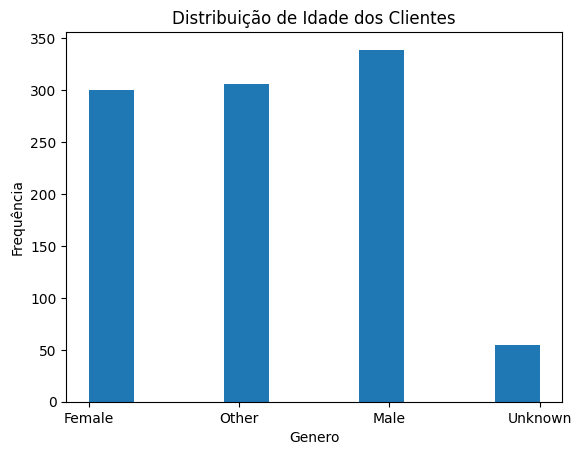

In [94]:
plt.hist(df['gender'], bins=10)
plt.xlabel('Genero')
plt.ylabel('Frequência')
plt.title('Distribuição de Idade dos Clientes')
plt.show()

In [95]:
df = df[df['spending_score'] <= 100]

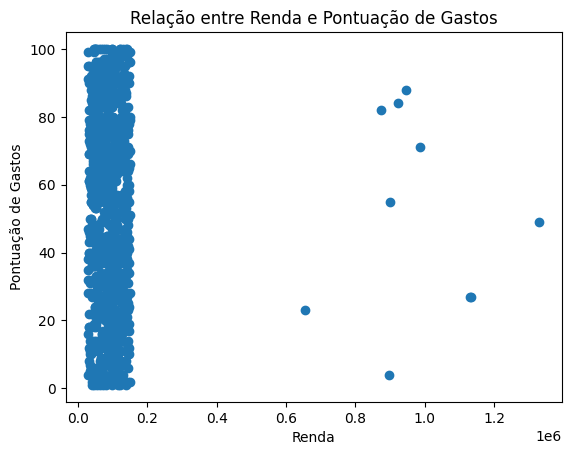

In [96]:
plt.scatter(df['income'], df['spending_score'])
plt.xlabel('Renda')
plt.ylabel('Pontuação de Gastos')
plt.title('Relação entre Renda e Pontuação de Gastos')
plt.show()

# Criando Segmentação

In [97]:

df['income_qcut'],bins = pd.qcut(df['income'], q=4,retbins=True, duplicates='drop')

In [98]:
df['income_qcut'].value_counts()

income_qcut
(30003.999, 60038.5]     248
(60038.5, 92031.0]       248
(115854.0, 1329680.0]    248
(92031.0, 115854.0]      247
Name: count, dtype: int64

In [99]:
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,income_qcut
0,1.0,38,Female,99342,90.0,3.0,24.0,Groceries,113.53,"(92031.0, 115854.0]"
1,2.0,21,Female,78852,60.0,2.0,42.0,Unknown,41.93,"(60038.5, 92031.0]"
2,3.0,60,Female,126573,30.0,2.0,28.0,Clothing,424.36,"(115854.0, 1329680.0]"
3,4.0,40,Other,47099,74.0,9.0,5.0,Unknown,991.93,"(30003.999, 60038.5]"
4,5.0,65,Female,140621,21.0,3.0,25.0,Electronics,347.08,"(115854.0, 1329680.0]"


In [100]:
income_counts = df['income_qcut'].value_counts()

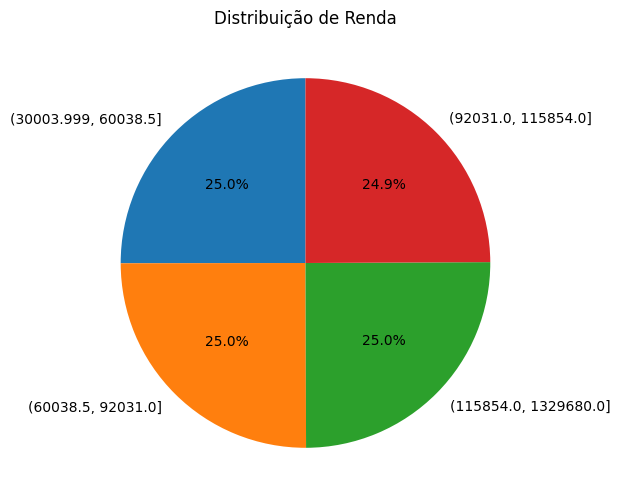

In [101]:
plt.figure(figsize=(8, 6))
plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Renda')
plt.show()

C:\Users\julio\AppData\Local\Temp\ipykernel_15428\1242780822.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('income_qcut')['spending_score'].mean().plot(kind='bar')


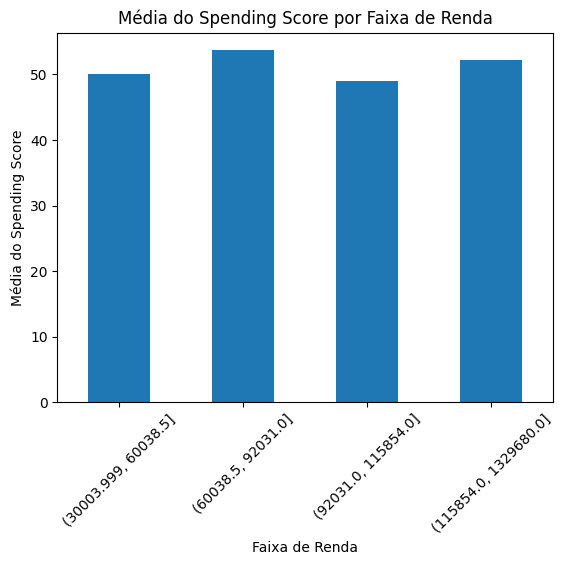

In [102]:
df.groupby('income_qcut')['spending_score'].mean().plot(kind='bar')
plt.title('Média do Spending Score por Faixa de Renda')
plt.xlabel('Faixa de Renda')
plt.ylabel('Média do Spending Score')
plt.xticks(rotation=45)
plt.show()

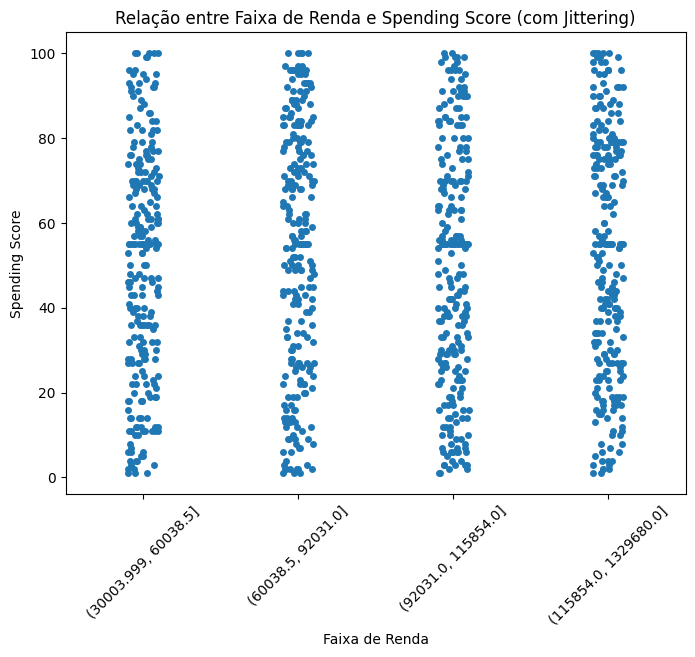

In [103]:

plt.figure(figsize=(8, 6))
sns.stripplot(x='income_qcut', y=df['spending_score'], data=df, jitter=True, dodge=True)
plt.title('Relação entre Faixa de Renda e Spending Score (com Jittering)')
plt.xlabel('Faixa de Renda')
plt.ylabel('Spending Score')
plt.xticks(rotation=45)
plt.show()

In [104]:
df['income_qcut'].info()

<class 'pandas.core.series.Series'>
Index: 991 entries, 0 to 999
Series name: income_qcut
Non-Null Count  Dtype   
--------------  -----   
991 non-null    category
dtypes: category(1)
memory usage: 8.9 KB


In [105]:
df['income_qcut'].value_counts()

income_qcut
(30003.999, 60038.5]     248
(60038.5, 92031.0]       248
(115854.0, 1329680.0]    248
(92031.0, 115854.0]      247
Name: count, dtype: int64

In [106]:
mapeamento_renda = {
    '(60038.5, 92031.0]':2,
    '(30003.999, 60038.5]':1,
    '(92031.0, 115854.0]':3,
    '(115854.0, 1329680.0]':4
}

df['income_level'] = df['income_qcut'].astype(str).map(mapeamento_renda)


In [107]:
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,income_qcut,income_level
0,1.0,38,Female,99342,90.0,3.0,24.0,Groceries,113.53,"(92031.0, 115854.0]",3
1,2.0,21,Female,78852,60.0,2.0,42.0,Unknown,41.93,"(60038.5, 92031.0]",2
2,3.0,60,Female,126573,30.0,2.0,28.0,Clothing,424.36,"(115854.0, 1329680.0]",4
3,4.0,40,Other,47099,74.0,9.0,5.0,Unknown,991.93,"(30003.999, 60038.5]",1
4,5.0,65,Female,140621,21.0,3.0,25.0,Electronics,347.08,"(115854.0, 1329680.0]",4


In [108]:
df['income_level'].value_counts()

income_level
2    248
4    248
1    248
3    247
Name: count, dtype: int64

In [109]:
df['spending_qcut'] = pd.qcut(df['spending_score'], q=4, duplicates='drop')

In [110]:
df['spending_qcut'].value_counts()

spending_qcut
(27.0, 54.932]    288
(0.999, 27.0]     254
(75.0, 100.0]     244
(54.932, 75.0]    205
Name: count, dtype: int64

In [111]:
mapeamento_spending = {
'(27.0, 54.932]': 2,
'(0.999, 27.0]':1,
'(75.0, 100.0]':4,
'(54.932, 75.0]':3

}


df['spending_level'] = df['spending_qcut'].astype(str).map(mapeamento_spending)

In [112]:
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,income_qcut,income_level,spending_qcut,spending_level
0,1.0,38,Female,99342,90.0,3.0,24.0,Groceries,113.53,"(92031.0, 115854.0]",3,"(75.0, 100.0]",4
1,2.0,21,Female,78852,60.0,2.0,42.0,Unknown,41.93,"(60038.5, 92031.0]",2,"(54.932, 75.0]",3
2,3.0,60,Female,126573,30.0,2.0,28.0,Clothing,424.36,"(115854.0, 1329680.0]",4,"(27.0, 54.932]",2
3,4.0,40,Other,47099,74.0,9.0,5.0,Unknown,991.93,"(30003.999, 60038.5]",1,"(54.932, 75.0]",3
4,5.0,65,Female,140621,21.0,3.0,25.0,Electronics,347.08,"(115854.0, 1329680.0]",4,"(0.999, 27.0]",1


In [113]:
df['purchase_frequency_qcut'] = pd.qcut(df['purchase_frequency'], q=4, duplicates='drop')

In [114]:
df['purchase_frequency_qcut'].value_counts()

purchase_frequency_qcut
(26.514, 38.0]    253
(15.5, 26.514]    249
(0.999, 15.5]     248
(38.0, 50.0]      241
Name: count, dtype: int64

In [115]:
mapeamento_purchase = {
    
    '(15.5, 26.514]':2, 
    '(0.999, 15.5]':1,  
    '(26.514, 38.0]':3,   
    '(38.0, 50.0]': 4
}


df['purchase_frequency_level'] = df['purchase_frequency_qcut'].astype(str).map(mapeamento_purchase)

In [116]:
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,income_qcut,income_level,spending_qcut,spending_level,purchase_frequency_qcut,purchase_frequency_level
0,1.0,38,Female,99342,90.0,3.0,24.0,Groceries,113.53,"(92031.0, 115854.0]",3,"(75.0, 100.0]",4,"(15.5, 26.514]",2
1,2.0,21,Female,78852,60.0,2.0,42.0,Unknown,41.93,"(60038.5, 92031.0]",2,"(54.932, 75.0]",3,"(38.0, 50.0]",4
2,3.0,60,Female,126573,30.0,2.0,28.0,Clothing,424.36,"(115854.0, 1329680.0]",4,"(27.0, 54.932]",2,"(26.514, 38.0]",3
3,4.0,40,Other,47099,74.0,9.0,5.0,Unknown,991.93,"(30003.999, 60038.5]",1,"(54.932, 75.0]",3,"(0.999, 15.5]",1
4,5.0,65,Female,140621,21.0,3.0,25.0,Electronics,347.08,"(115854.0, 1329680.0]",4,"(0.999, 27.0]",1,"(15.5, 26.514]",2


In [117]:
df['membership_years_qcut'] = pd.qcut(df['membership_years'], q=4, duplicates='drop')

df['membership_years_qcut'].value_counts()

membership_years_qcut
(0.999, 3.0]    285
(5.46, 8.0]     258
(3.0, 5.46]     254
(8.0, 10.0]     194
Name: count, dtype: int64

In [118]:
mapeamento_years = {
    '(3.0, 5.46]':2,
    '(0.999, 3.0]':1,
    '(5.46, 8.0]':3,
    '(8.0, 10.0]':4
}


df['membership_years_score'] = df['membership_years_qcut'].astype(str).map(mapeamento_years)

In [119]:

df['membership_years_score'].unique()

array([1, 4, 2, 3])

In [120]:
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,income_qcut,income_level,spending_qcut,spending_level,purchase_frequency_qcut,purchase_frequency_level,membership_years_qcut,membership_years_score
0,1.0,38,Female,99342,90.0,3.0,24.0,Groceries,113.53,"(92031.0, 115854.0]",3,"(75.0, 100.0]",4,"(15.5, 26.514]",2,"(0.999, 3.0]",1
1,2.0,21,Female,78852,60.0,2.0,42.0,Unknown,41.93,"(60038.5, 92031.0]",2,"(54.932, 75.0]",3,"(38.0, 50.0]",4,"(0.999, 3.0]",1
2,3.0,60,Female,126573,30.0,2.0,28.0,Clothing,424.36,"(115854.0, 1329680.0]",4,"(27.0, 54.932]",2,"(26.514, 38.0]",3,"(0.999, 3.0]",1
3,4.0,40,Other,47099,74.0,9.0,5.0,Unknown,991.93,"(30003.999, 60038.5]",1,"(54.932, 75.0]",3,"(0.999, 15.5]",1,"(8.0, 10.0]",4
4,5.0,65,Female,140621,21.0,3.0,25.0,Electronics,347.08,"(115854.0, 1329680.0]",4,"(0.999, 27.0]",1,"(15.5, 26.514]",2,"(0.999, 3.0]",1


In [121]:
df['last_purchase_amount_qcut'] = pd.qcut(df['last_purchase_amount'], q=4, duplicates='drop')

df['last_purchase_amount_qcut'].value_counts()

last_purchase_amount_qcut
(232.75, 492.32]                274
(10.399000000000001, 232.75]    248
(736.37, 998.98]                248
(492.32, 736.37]                221
Name: count, dtype: int64

In [122]:
mapeamento_amount = {
    '(232.75, 492.32]':2,
    '(10.399000000000001, 232.75]': 1,
    '(492.32, 736.37]': 3,
    '(736.37, 998.98]':4
}


df['last_purchase_amount_score'] = df['last_purchase_amount_qcut'].astype(str).map(mapeamento_amount)

In [123]:
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,income_qcut,income_level,spending_qcut,spending_level,purchase_frequency_qcut,purchase_frequency_level,membership_years_qcut,membership_years_score,last_purchase_amount_qcut,last_purchase_amount_score
0,1.0,38,Female,99342,90.0,3.0,24.0,Groceries,113.53,"(92031.0, 115854.0]",3,"(75.0, 100.0]",4,"(15.5, 26.514]",2,"(0.999, 3.0]",1,"(10.399000000000001, 232.75]",1
1,2.0,21,Female,78852,60.0,2.0,42.0,Unknown,41.93,"(60038.5, 92031.0]",2,"(54.932, 75.0]",3,"(38.0, 50.0]",4,"(0.999, 3.0]",1,"(10.399000000000001, 232.75]",1
2,3.0,60,Female,126573,30.0,2.0,28.0,Clothing,424.36,"(115854.0, 1329680.0]",4,"(27.0, 54.932]",2,"(26.514, 38.0]",3,"(0.999, 3.0]",1,"(232.75, 492.32]",2
3,4.0,40,Other,47099,74.0,9.0,5.0,Unknown,991.93,"(30003.999, 60038.5]",1,"(54.932, 75.0]",3,"(0.999, 15.5]",1,"(8.0, 10.0]",4,"(736.37, 998.98]",4
4,5.0,65,Female,140621,21.0,3.0,25.0,Electronics,347.08,"(115854.0, 1329680.0]",4,"(0.999, 27.0]",1,"(15.5, 26.514]",2,"(0.999, 3.0]",1,"(232.75, 492.32]",2


In [124]:
df['score_final'] = df['income_level'] + df['spending_level'] + df['purchase_frequency_level'] + df['membership_years_score'] + df['last_purchase_amount_score']

In [125]:
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,income_qcut,income_level,spending_qcut,spending_level,purchase_frequency_qcut,purchase_frequency_level,membership_years_qcut,membership_years_score,last_purchase_amount_qcut,last_purchase_amount_score,score_final
0,1.0,38,Female,99342,90.0,3.0,24.0,Groceries,113.53,"(92031.0, 115854.0]",3,"(75.0, 100.0]",4,"(15.5, 26.514]",2,"(0.999, 3.0]",1,"(10.399000000000001, 232.75]",1,11
1,2.0,21,Female,78852,60.0,2.0,42.0,Unknown,41.93,"(60038.5, 92031.0]",2,"(54.932, 75.0]",3,"(38.0, 50.0]",4,"(0.999, 3.0]",1,"(10.399000000000001, 232.75]",1,11
2,3.0,60,Female,126573,30.0,2.0,28.0,Clothing,424.36,"(115854.0, 1329680.0]",4,"(27.0, 54.932]",2,"(26.514, 38.0]",3,"(0.999, 3.0]",1,"(232.75, 492.32]",2,12
3,4.0,40,Other,47099,74.0,9.0,5.0,Unknown,991.93,"(30003.999, 60038.5]",1,"(54.932, 75.0]",3,"(0.999, 15.5]",1,"(8.0, 10.0]",4,"(736.37, 998.98]",4,13
4,5.0,65,Female,140621,21.0,3.0,25.0,Electronics,347.08,"(115854.0, 1329680.0]",4,"(0.999, 27.0]",1,"(15.5, 26.514]",2,"(0.999, 3.0]",1,"(232.75, 492.32]",2,10


In [126]:
 df['score_final_qcut'] = pd.qcut(df['score_final'], q=3, duplicates='drop')

In [127]:
 df['score_final_qcut'].value_counts()

score_final_qcut
(5.999, 11.0]    399
(13.0, 20.0]     299
(11.0, 13.0]     293
Name: count, dtype: int64

In [128]:
print( df['income_level'].max())
print(df['spending_level'].max())
print( df['purchase_frequency_level'].max())
print(df['membership_years_score'].max())
print(df['last_purchase_amount_score'].max())

4
4
4
4
4


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   id                          991 non-null    object  
 1   age                         991 non-null    int64   
 2   gender                      991 non-null    object  
 3   income                      991 non-null    int64   
 4   spending_score              991 non-null    float64 
 5   membership_years            991 non-null    float64 
 6   purchase_frequency          991 non-null    float64 
 7   preferred_category          991 non-null    object  
 8   last_purchase_amount        991 non-null    float64 
 9   income_qcut                 991 non-null    category
 10  income_level                991 non-null    int64   
 11  spending_qcut               991 non-null    category
 12  spending_level              991 non-null    int64   
 13  purchase_frequency_qcut  

In [130]:
df['score_final_qcut'].value_counts()

score_final_qcut
(5.999, 11.0]    399
(13.0, 20.0]     299
(11.0, 13.0]     293
Name: count, dtype: int64

In [131]:
mapeamento_score = {
    '(5.999, 11.0]': 'bronze',
    '(11.0, 13.0]': 'prata',
    '(13.0, 20.0]':'ouro'
}


df['categoria_cliente'] = df['score_final_qcut'].astype(str).map(mapeamento_score)

In [132]:
df['score_final'].unique()

array([11, 12, 13, 10,  7, 17, 14, 16,  8,  9, 15, 20, 18,  6, 19])

# Segmentação Pronta

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   id                          991 non-null    object  
 1   age                         991 non-null    int64   
 2   gender                      991 non-null    object  
 3   income                      991 non-null    int64   
 4   spending_score              991 non-null    float64 
 5   membership_years            991 non-null    float64 
 6   purchase_frequency          991 non-null    float64 
 7   preferred_category          991 non-null    object  
 8   last_purchase_amount        991 non-null    float64 
 9   income_qcut                 991 non-null    category
 10  income_level                991 non-null    int64   
 11  spending_qcut               991 non-null    category
 12  spending_level              991 non-null    int64   
 13  purchase_frequency_qcut  

In [134]:
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,income_qcut,...,spending_level,purchase_frequency_qcut,purchase_frequency_level,membership_years_qcut,membership_years_score,last_purchase_amount_qcut,last_purchase_amount_score,score_final,score_final_qcut,categoria_cliente
0,1.0,38,Female,99342,90.0,3.0,24.0,Groceries,113.53,"(92031.0, 115854.0]",...,4,"(15.5, 26.514]",2,"(0.999, 3.0]",1,"(10.399000000000001, 232.75]",1,11,"(5.999, 11.0]",bronze
1,2.0,21,Female,78852,60.0,2.0,42.0,Unknown,41.93,"(60038.5, 92031.0]",...,3,"(38.0, 50.0]",4,"(0.999, 3.0]",1,"(10.399000000000001, 232.75]",1,11,"(5.999, 11.0]",bronze
2,3.0,60,Female,126573,30.0,2.0,28.0,Clothing,424.36,"(115854.0, 1329680.0]",...,2,"(26.514, 38.0]",3,"(0.999, 3.0]",1,"(232.75, 492.32]",2,12,"(11.0, 13.0]",prata
3,4.0,40,Other,47099,74.0,9.0,5.0,Unknown,991.93,"(30003.999, 60038.5]",...,3,"(0.999, 15.5]",1,"(8.0, 10.0]",4,"(736.37, 998.98]",4,13,"(11.0, 13.0]",prata
4,5.0,65,Female,140621,21.0,3.0,25.0,Electronics,347.08,"(115854.0, 1329680.0]",...,1,"(15.5, 26.514]",2,"(0.999, 3.0]",1,"(232.75, 492.32]",2,10,"(5.999, 11.0]",bronze


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   id                          991 non-null    object  
 1   age                         991 non-null    int64   
 2   gender                      991 non-null    object  
 3   income                      991 non-null    int64   
 4   spending_score              991 non-null    float64 
 5   membership_years            991 non-null    float64 
 6   purchase_frequency          991 non-null    float64 
 7   preferred_category          991 non-null    object  
 8   last_purchase_amount        991 non-null    float64 
 9   income_qcut                 991 non-null    category
 10  income_level                991 non-null    int64   
 11  spending_qcut               991 non-null    category
 12  spending_level              991 non-null    int64   
 13  purchase_frequency_qcut  

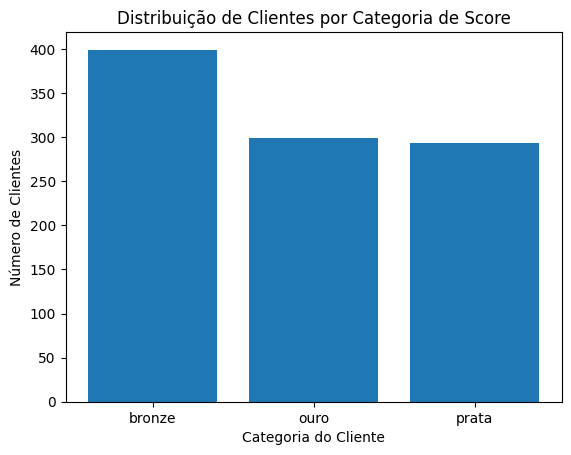

In [136]:
contagem_categorias = df['categoria_cliente'].value_counts()

# Criando o gráfico de barras
plt.bar(contagem_categorias.index, contagem_categorias.values)

# Configurando o título e os rótulos dos eixos
plt.title('Distribuição de Clientes por Categoria de Score')
plt.xlabel('Categoria do Cliente')
plt.ylabel('Número de Clientes')

# Exibindo o gráfico
plt.show()